<a href="https://colab.research.google.com/github/Rebecca-ZYC/fortest_trash/blob/main/practiseCNNMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X0SDJA9OSSEE3xLHkI8B")
project = rf.workspace("rebecca-zhu-oxvvk").project("four-trash-type-classification")
dataset = project.version(1).download("folder")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=6c2fa226c01e677a590a7dc361a6fc4086b3d850dd70774c7b41b3b9df4d6a63
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to four-trash-type-classification-1 in folder:: 100%|██████████| 20300/20300 [00:16<00:00, 1209.34it/s]


In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/four-trash-type-classification-1/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/four-trash-type-classification-1/test/Harmful_Waste/img_18493_jpg.rf.f82a669a3e3f74aae7e4d050e99c7ed6.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_19128_jpg.rf.b44c230010aa6d7507cfcf1d5a1e01e6.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_19016_jpg.rf.04896aef183738b3991a22eaad5b6b88.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_18788_jpg.rf.ff723e28113436b0892b147fe3514dee.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_18993_jpg.rf.5161e13b62160f8671f04cca9f48dd7d.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_19453_jpg.rf.69baba1793e42d8bdeb51b7f1088f944.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_19026_jpg.rf.cfd68359c7910942648a9a4ae07f2a5a.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_19493_jpg.rf.b34b6b15c766dc4c78192272598d7aa2.jpg
/content/four-trash-type-classification-1/test/Harmful_Waste/img_18301_jpg.rf.f0

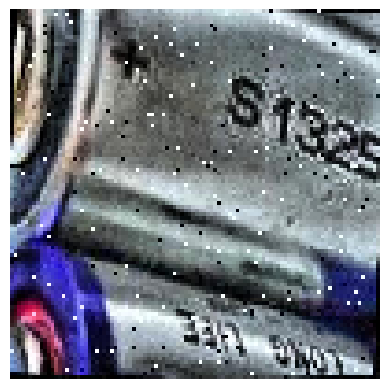

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = '/content/four-trash-type-classification-1/train/'
valid_path = '/content/four-trash-type-classification-1/valid/'
test_path = '/content/four-trash-type-classification-1/test/'
#Displaying the image
img = load_img(train_path + "/Harmful_Waste/img_18235_jpg.rf.0fd1918c14894d80b0b53065bfc68fd0.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [ ]:
#Storing occurences of fruits in a list
trash = []
trash_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        trash.append(i)
        trash_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(trash)
frequent_trash = newData.most_common(4)
print("num of images for each type:")
frequent_trash

num of images for each type:


[('Kitchen_Waste', 6309),
 ('Recyclable', 5760),
 ('Other_Waste', 4013),
 ('Harmful_Waste', 2646)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

4


Create the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

# Creating the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(100, activation='relu', input_shape=(model.output_shape[1],)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(100, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(number_of_class, activation='softmax'))

# Combining the models
combined_model = Sequential()
combined_model.add(model)
combined_model.add(mlp_model)

# Compiling the model
combined_model.compile(loss="categorical_crossentropy",
                       optimizer="rmsprop",
                       metrics=["accuracy"])

# Getting model's summary
combined_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4)                 6587364   
                                                                 
 sequential_1 (Sequential)   (None, 4)                 11004     
                                                                 
Total params: 6,598,368
Trainable params: 6,598,368
Non-trainable params: 0
_________________________________________________________________


Specifying Epochs and Batch size
We’ll specify the number of epochs and batch_size for our model. Let us understand what is an epoch and batch size is.

The number of epochs is a hyperparameter that defines the number of times that the learning algorithm will work through the entire training dataset.

The batch_size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

In [ ]:
#Specifing epochs & batch size
epochs = 200
batch_size = 64

#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 18728 images belonging to 4 classes.
Found 775 images belonging to 4 classes.


In [ ]:
# Compiling the model
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# Fitting the model
hist = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=400 // batch_size
)

Epoch 1/200
25/25 [==============================] - 49s 2s/step - loss: 0.8157 - accuracy: 0.6625 - val_loss: 1.0079 - val_accuracy: 0.6068
Epoch 2/200
25/25 [==============================] - 52s 2s/step - loss: 0.8126 - accuracy: 0.6719 - val_loss: 1.0014 - val_accuracy: 0.6042
Epoch 3/200
25/25 [==============================] - 46s 2s/step - loss: 0.7862 - accuracy: 0.6725 - val_loss: 0.9860 - val_accuracy: 0.5807
Epoch 4/200
25/25 [==============================] - 48s 2s/step - loss: 0.7430 - accuracy: 0.6840 - val_loss: 0.9938 - val_accuracy: 0.5990
Epoch 5/200
25/25 [==============================] - 46s 2s/step - loss: 0.7779 - accuracy: 0.6794 - val_loss: 0.9161 - val_accuracy: 0.6484
Epoch 6/200
25/25 [==============================] - 47s 2s/step - loss: 0.7801 - accuracy: 0.6787 - val_loss: 0.9274 - val_accuracy: 0.6510
Epoch 7/200
25/25 [==============================] - 48s 2s/step - loss: 0.7954 - accuracy: 0.6644 - val_loss: 0.9579 - val_accuracy: 0.6276
Epoch 8/200
2

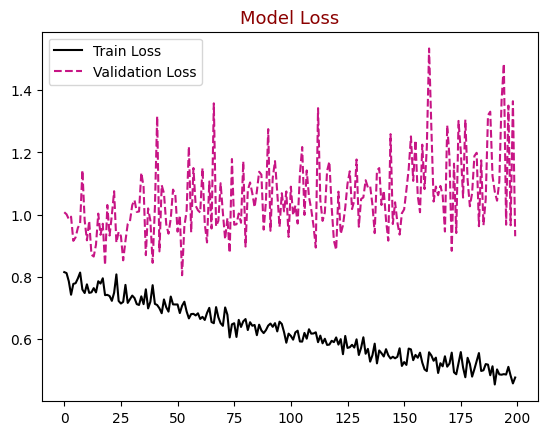

In [ ]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

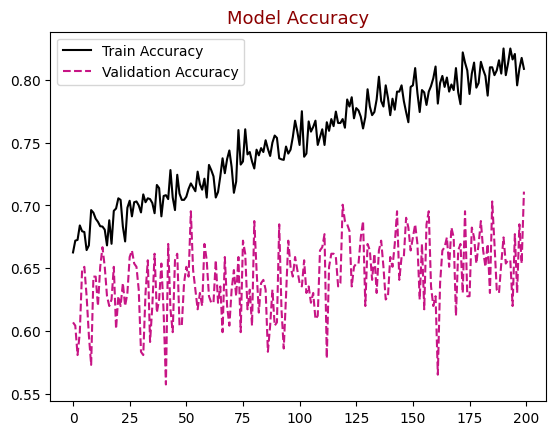

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

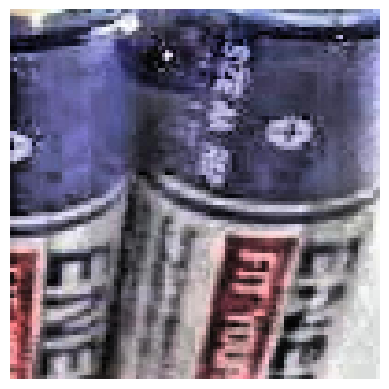

In [ ]:
#Displaying the selected image
img = load_img(test_path + "Harmful_Waste/img_18259_jpg.rf.1aecc83505cbcbe7da2ea593bd9a5aad.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('/content/four-trash-type-classification-1/test/Harmful_Waste/img_18259_jpg.rf.1aecc83505cbcbe7da2ea593bd9a5aad.jpg')


In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Harmful_Waste': 0, 'Kitchen_Waste': 1, 'Other_Waste': 2, 'Recyclable': 3}


In [ ]:

def load(filename):
    np_image = Image.open(filename)
    np_image = np_image.resize((100, 100))
    np_image = np.array(np_image).astype('float32') / 255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

# Path to the image file
image_path = '/content/four-trash-type-classification-1/test/Harmful_Waste/img_18259_jpg.rf.1aecc83505cbcbe7da2ea593bd9a5aad.jpg'

# Load the image
image = load(image_path)

# Predicting the class
prediction = np.argmax(model.predict(image), axis=-1)
print(prediction)


1/1 [==============================] - 1s 602ms/step
[0]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/My Drive

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive': No such file or directory


In [ ]:
import torch
model_save_name = 'trash_classifier_CI.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.save_weights(path)